<a href="https://colab.research.google.com/github/2-Arumy/rumy/blob/master/20_03_11_Fura2_calcium_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm *.xlsx

## 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving KO_raw_data.xlsx to KO_raw_data.xlsx
Saving WT_raw_data.xlsx to WT_raw_data.xlsx


In [0]:
import os
import pandas as pd
import numpy as np
import sys 
from collections import OrderedDict
from collections import Counter
import math 
import matplotlib.pyplot as plt

workbook={}
analyzed_total_data={}

for fn in uploaded.keys():
  workbook[fn]=pd.read_excel(fn, sheet_name=None)
  sheet_number=len(workbook[fn])
  print('the number of sheet of {} = '.format(fn),sheet_number)

  pre_data_name_list=[]
  pre_data_set_list=[]
  
  for key in workbook[fn]:
    pre_data_name_list.append(key)
    pre_data_set_list.append(key.split('_')[1])
  data_set_list=list(OrderedDict.fromkeys(pre_data_set_list))
  print('the number of data set = ',data_set_list)
  sheet_data={}
  sheet_cell_data={}
  new_sheet_data={}
  cell_number_list=[]
  for i in range(0, len(pre_data_name_list)):
    sheet_data[pre_data_name_list[i]]=workbook[fn][pre_data_name_list[i]]
    pre_cell_number=sheet_data[pre_data_name_list[i]]['Region Label'].value_counts()
    pre_cell_number2=len(pre_cell_number)
    #Background region 제외 진짜 ROI number 구하기 
    cell_number=pre_cell_number2-1
    cell_number_list.append(cell_number)
    
    #Frame number 구하기
    frame_number=int(pre_cell_number[1])
    #Time 구하기
    time_series=sheet_data[pre_data_name_list[i]]['Elapsed Time'][:frame_number]
    #Background correction
    for n in range(1,pre_cell_number2+1):
      sheet_cell_data[n]=sheet_data[pre_data_name_list[i]]['Average Intensity'][frame_number*(n-1):frame_number*(n)]
      sheet_cell_data[n].index=range(0,frame_number)
      sheet_cell_data_df=pd.DataFrame(sheet_cell_data, columns=range(1, pre_cell_number2+1))
      background_cell=sheet_cell_data_df[pre_cell_number2]

    corrected_sheet_cell_data={}
    for n in range(1, pre_cell_number2):
      corrected_sheet_cell_data[n]=sheet_cell_data[n]-background_cell
      corrected_sheet_cell_data_df=pd.DataFrame(corrected_sheet_cell_data, columns=range(1,pre_cell_number2))
    new_sheet_data[pre_data_name_list[i]]=corrected_sheet_cell_data_df
  total_cell_number=int(sum(cell_number_list)/2)
  print('total cell number = ', total_cell_number)
  normalized_sheet_data={}  
  total_data_list=[]
  for data_number in range(1, int(sheet_number/2)+1):
    normalized_sheet_data['{}'.format(data_number)]=new_sheet_data['340_{}'.format(data_number)]/new_sheet_data['380_{}'.format(data_number)]
    total_data_list.append(normalized_sheet_data['{}'.format(data_number)])
  total_data=pd.concat(total_data_list, sort=True, axis=1)
  total_data.columns=range(1, total_cell_number+1)
  #total_cell_number_sqrt=math.sqrt(total_cell_number)
  mean_value=[]
  sd_value=[]
  count_value=[]
  sem_value=[]
  for frame in range (0, frame_number):
    mean_value.append(total_data.iloc[frame].mean())
    sd_value.append(total_data.iloc[frame].std())
    count_value.append(total_data.iloc[frame].count())
  for frame in range (0, frame_number):
    sem_value.append(sd_value[frame]/math.sqrt(count_value[frame]))
  
  mean_value_df=pd.DataFrame(mean_value, columns=['Mean'])
  sd_value_df=pd.DataFrame(sd_value, columns=['SD'])
  sem_value_df=pd.DataFrame(sem_value, columns=['SEM'])

  analyzed_total_data[fn]=pd.concat([mean_value_df, sd_value_df, sem_value_df], axis=1, sort=True)

  

the number of sheet of KO_raw_data.xlsx =  8
the number of data set =  ['1', '2', '3', '4']
total cell number =  33
the number of sheet of WT_raw_data.xlsx =  8
the number of data set =  ['1', '2', '3', '4']
total cell number =  69


In [0]:
print(analyzed_total_data)

In [0]:
from datetime import datetime
time_list=[]
for tn in range(0,frame_number):
  t=time_series[tn]
  seconds=(t.hour*60+t.minute)*60+t.second
  time_list.append(seconds)
print(time_list)

[0, 4, 9, 13, 18, 22, 27, 31, 36, 41, 45, 50, 54, 59, 63, 68, 73, 77, 82, 86, 91, 95, 100, 104, 109, 114, 118, 123, 127, 132, 136, 141, 145, 149, 154, 158, 163, 167, 171, 175, 179, 183, 187, 192, 196, 201, 206, 210, 215, 221, 225, 229, 233, 238, 243, 247, 251, 255, 260, 265, 269, 273, 277, 282, 286, 290, 295, 299, 303, 307, 311, 316, 320, 324, 328, 333, 337, 341, 345, 350, 354, 358, 362, 367, 371, 375, 379, 383, 388, 392, 397, 401, 406, 410, 415, 419, 424, 428, 433, 438, 442, 447, 451, 456, 460, 465, 470, 474, 479, 483, 488, 492, 497, 502, 506, 511, 515, 520, 524, 529, 533, 538, 542, 547, 552, 556, 561, 565, 570, 575, 579, 584, 588, 593, 597, 602, 606, 611, 616, 620, 625, 629, 634, 638, 643, 649, 653, 658, 662, 667, 672]


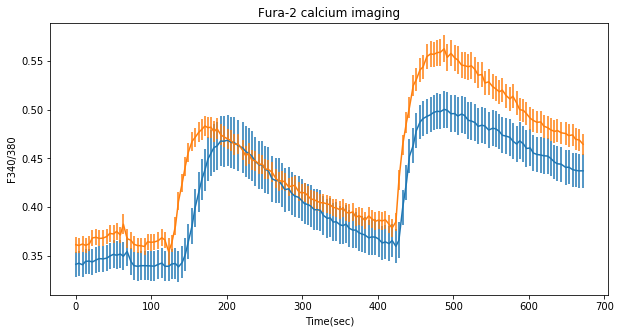

In [0]:
import matplotlib.pyplot as plt
import sys

x_list=time_series
frame_list=list(range(0, len(x_list)))
fig=plt.figure(figsize=(10,5))
for fn in uploaded.keys():
  data_name=fn.split('_')[0]
  y_list=analyzed_total_data[fn]['Mean']
  plt.errorbar(time_list, y_list, yerr=analyzed_total_data[fn]['SEM'], label=data_name)

ax1.legend()
plt.xlabel('Time(sec)')
plt.ylabel('F340/380')
plt.title('Fura-2 calcium imaging')
plt.show()